In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
import math
median_bedroom = math.floor(df.bedrooms.median())
median_bedroom

4

In [ ]:
df.bedrooms = df.bedrooms.fillna(median_bedroom)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [ ]:
reg.coef_, reg.intercept_

(array([  112.06244194, 23388.88007794, -3231.71790863]), 221323.00186540396)

In [ ]:
reg.predict([[3000,3,40]])
reg.predict([[2500,4,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

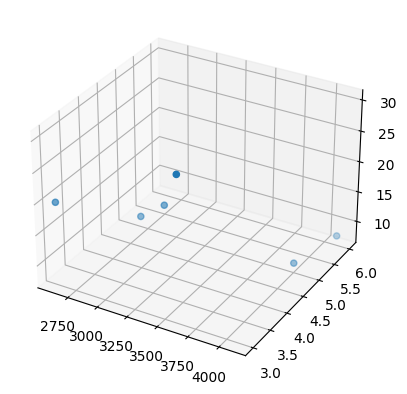

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df.area, df.bedrooms, df.age)


In [ ]:
#Excercise
df1 = pd.read_csv('/content/hiring.csv')
df1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
!pip install word2number

In [ ]:
from word2number import w2n
df1.experience = df1.experience.fillna("zero")
df1.experience = df1.experience.apply(w2n.word_to_num)

In [ ]:

df1 = df1.rename(columns = {"experience":"experience", "test_score(out of 10)":"test_score","interview_score(out of 10)":"interview_score", "Salary($)":"Salary"})
df1


,experience,test_score,interview_score,salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
df1.test_score = df1.test_score.fillna(df1.test_score.median())
df1

,experience,test_score,interview_score,salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg1 = linear_model.LinearRegression()
reg1.fit(df1[['experience','test_score','interview_score']],df1[['salary($)']])


LinearRegression()

In [ ]:
reg1.coef_, reg1.intercept_

(array([[2812.95487627, 1845.70596798, 2205.24017467]]),
 array([17737.26346434]))

In [ ]:
reg1.predict([[2,9,6]])
reg1.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[92002.18340611]])